In [15]:
import pandas as pd

df = pd.read_csv('/content/kaggle_survey_2017_2021.csv', engine='python', on_bad_lines='skip')

display(df.head())

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# data cleaning
# Removed the first row
df = df.iloc[1:].copy()

# Checking for missing values :D
missing_values = df.isnull().sum()
display("Missing values per column:")
display(missing_values[missing_values > 0])

# Examining the data types
display("Data types:")
display(df.dtypes)

'Missing values per column:'

,0
Q7_Part_1,1543
Q7_Part_2,7742
Q7_Part_3,5763
Q7_Part_4,7987
Q7_Part_5,7689
...,...
Q38_B_Part_6,9477
Q38_B_Part_7,9473
Q38_B_Part_9,9498
Q38_B_Part_11,9746


'Data types:'

,0
-,object
Time from Start to Finish (seconds),object
Q1,object
Q2,object
Q3,object
...,...
Q38_B_Part_6,object
Q38_B_Part_7,object
Q38_B_Part_9,object
Q38_B_Part_11,object


In [ ]:
# (potential categorical)
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object' and df[col].nunique() < 50: # Heuristic: less than 50 unique values
        categorical_cols.append(col)

print(f"Identified {len(categorical_cols)} potential categorical columns.")
# now imma apply Label Encoding to the identified categorical columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

display("DataFrame after encoding:")
display(df.head())

Identified 291 potential categorical columns.


'DataFrame after encoding:'

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,4,Duration (in seconds),11,6,In which country do you currently reside?,8,23,11,1,1,...,1,1,1,1,1,1,1,1,0,0
1,3,910,7,2,India,0,15,8,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,3,784,7,2,Indonesia,3,19,3,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,3,924,1,2,Pakistan,3,24,1,0,-1,...,-1,-1,-1,-1,0,-1,-1,-1,-1,-1
4,3,575,6,2,Mexico,1,21,3,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
demographic_professional_cols = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'] # Age, Gender, Country, Education, Job Title, Experience
print("Analysis of Demographic and Professional Columns:")
for col in demographic_professional_cols:
    if col in df.columns:
        # Removed individual value_counts() and describe() calls to reduce repetition
        pass
    else:
        print(f"Column {col} not found in DataFrame.")

tech_cols = [col for col in df.columns if any(keyword in col for keyword in ['Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38'])]
print("\nAnalysis of Tools and Technologies Usage:")
# For simplicity and due to the large number of tech columns, we will analyze value counts for a subset
subset_tech_cols = [col for col in tech_cols if '_Part_' in col]

for col in subset_tech_cols[:10]:
    if col in df.columns:
        # Removed individual value_counts() calls to reduce repetition
        pass
    else:
        print(f"Column {col} not found in DataFrame.")

print("\nInvestigating Relationships (Example: Country and Python Usage):")
if 'Q3' in df.columns and 'Q7_Part_1' in df.columns:
    # Filter for respondents who use Python (assuming Q7_Part_1 encoded as 0 for use, -1 for not used/missing)
    python_users = df[df['Q7_Part_1'] == 0]
    if not python_users.empty:
        # Removed individual value_counts() call to reduce repetition
        pass
    else:
        print("No Python users found based on Q7_Part_1 encoding.")
else:
    print("Required columns (Q3 or Q7_Part_1) not found for relationship analysis.")

Analysis of Demographic and Professional Columns:

Analysis of Tools and Technologies Usage:

Investigating Relationships (Example: Country and Python Usage):


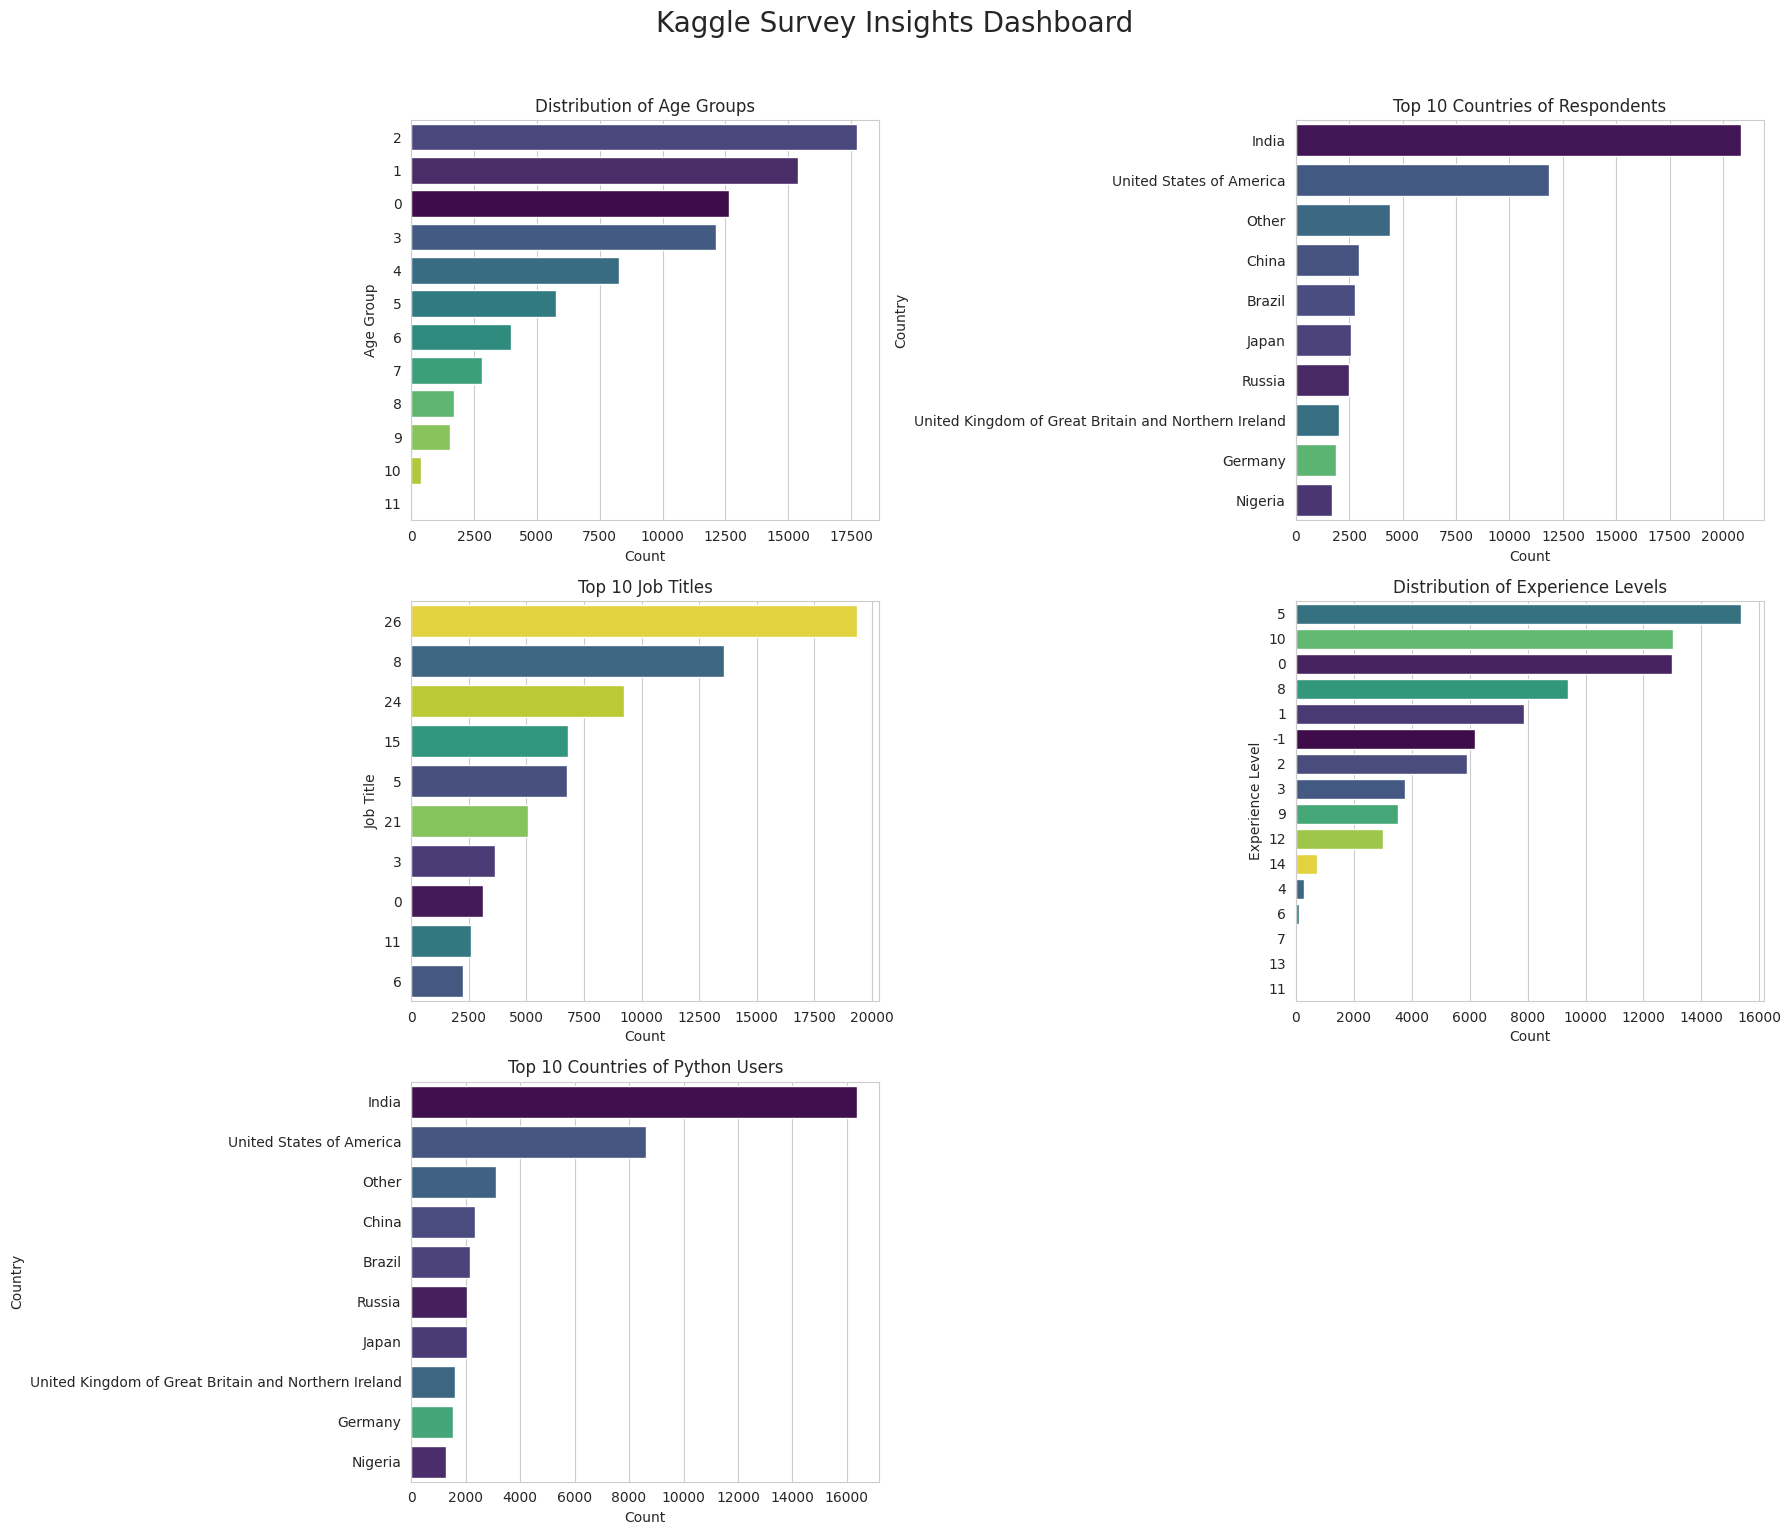

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Insight 1: Distribution of Age (Q1)
sns.countplot(data=df, y='Q1', order=df['Q1'].value_counts().index, ax=axes[0], palette='viridis', hue='Q1', legend=False)
axes[0].set_title('Distribution of Age Groups')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Age Group')

# Insight 2: Distribution of Country (Q3) - Top 10
sns.countplot(data=df, y='Q3', order=df['Q3'].value_counts().nlargest(10).index, ax=axes[1], palette='viridis', hue='Q3', legend=False)
axes[1].set_title('Top 10 Countries of Respondents')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Country')

# Insight 3: Distribution of Job Title (Q5) - Top 10
sns.countplot(data=df, y='Q5', order=df['Q5'].value_counts().nlargest(10).index, ax=axes[2], palette='viridis', hue='Q5', legend=False)
axes[2].set_title('Top 10 Job Titles')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Job Title')

# Insight 4: Distribution of Experience (Q6)
sns.countplot(data=df, y='Q6', order=df['Q6'].value_counts().index, ax=axes[3], palette='viridis', hue='Q6', legend=False)
axes[3].set_title('Distribution of Experience Levels')
axes[3].set_xlabel('Count')
axes[3].set_ylabel('Experience Level')

# Insight 5: Distribution of Python Users by Country (Q3 among python_users) - Top 10
python_users = df[df['Q7_Part_1'] == 0]
if not python_users.empty:
    sns.countplot(data=python_users, y='Q3', order=python_users['Q3'].value_counts().nlargest(10).index, ax=axes[4], palette='viridis', hue='Q3', legend=False)
    axes[4].set_title('Top 10 Countries of Python Users')
    axes[4].set_xlabel('Count')
    axes[4].set_ylabel('Country')
else:
    axes[4].set_title('No Python Users Found for Analysis')
    axes[4].text(0.5, 0.5, 'No data for Python users', horizontalalignment='center', verticalalignment='center', transform=axes[4].transAxes)


# Remove the empty subplot
fig.delaxes(axes[5])

# Add an overall title to the dashboard
fig.suptitle('Kaggle Survey Insights Dashboard', fontsize=20, y=1.02)

plt.tight_layout()
plt.show()

### Key Insights from the Data Science Survey

This analysis focused on cleaning and extracting actionable insights from the survey data to inform recruiting and educational efforts.

**Top Findings:**

1. **Distribution of Age Groups:** This chart shows the distribution of respondents across different age groups.
2. **Top 10 Countries of Respondents:** This chart highlights the top 10 countries where the survey respondents reside.
3. **Top 10 Job Titles:** This chart displays the top 10 most common job titles among the respondents.
4. **Distribution of Experience Levels:** This chart illustrates the distribution of coding experience levels among the respondents.
5. **Top 10 Countries of Python Users:** This chart shows the top 10 countries where Python users are most prevalent, based on the survey data.